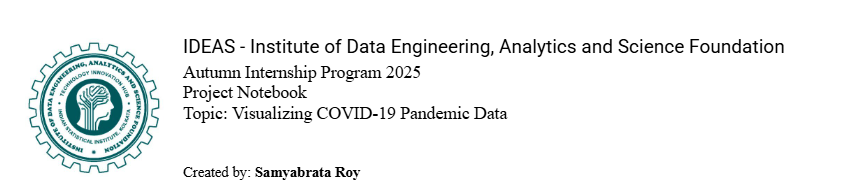

# Notebook: 1

👋 Welcome students!

In this journey, we’re going to take a dataset and slowly uncover the story it tells through visualization. Numbers by themselves can feel cold and endless, but once we turn them into visuals, they begin to speak.


---



##📖 Introduction

When the COVID-19 pandemic began, the world was flooded with numbers — daily cases, recoveries, deaths, and later vaccinations. Looking at endless tables of figures wasn’t just boring, it was confusing.

But the moment those numbers were drawn into curves, bars, and maps, they started to make sense. Suddenly, we could see when cases were rising, where outbreaks were spreading, and how vaccinations were helping. The data wasn’t just numbers anymore — it was a story of how the world was coping.

That’s the real power of visualization. It’s not about making charts look pretty — it’s about making data human, so that anyone, not just experts, can understand what’s happening.

In this notebook, we’ll take COVID-19 data and learn step by step how to explore and visualize it using Python. Some of the code will be ready for you, while some parts will be left for you to try on your own. By the end, you’ll see how visualization can transform raw data into meaningful insights — and how those insights help us understand events that shape our lives.



---

## 📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**  
   *(Hint: Think about data that is recorded over time — like daily COVID-19 cases.)*

   **Ans:** Time-series data is a sequence of data points collected or recorded at regular time intervals, showing how a variable changes over time.

2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
   Feel free to share your honest opinion — there’s no right or wrong answer here!  

   **Ans:** Yes, choosing Python is a good decision because it has powerful libraries like Pandas, NumPy, Matplotlib, Seaborn, and Statsmodels, along with specialized ones like scikit-learn and Prophet that make time-series analysis, visualization, and forecasting efficient and easy.
   


---

## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the COVID-19 dataset.  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [ ]:
# Replace with your Google Drive file ID which has public view access
file_id = "1Sj3Il94NXun9owedSWNGrxszjpAXTDEQ"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
  # Read CSV directly into pandas
  df_covid = pd.read_csv(url)

  # Show first few rows
  print(df_covid.head())
except Exception as e:
    print(f"Error loading data: {e}")

  Date_reported Country_code     Country WHO_region  New_cases  \
0    2020-01-04           AI    Anguilla        AMR        NaN   
1    2020-01-04           AZ  Azerbaijan        EUR        NaN   
2    2020-01-04           BD  Bangladesh       SEAR        0.0   
3    2020-01-04           BB    Barbados        AMR        NaN   
4    2020-01-04           BR      Brazil        AMR        NaN   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0         NaN                  0  
1                 0         NaN                  0  
2                 0         0.0                  0  
3                 0         NaN                  0  
4                 0         NaN                  0  


## Subsetting the Dataset for Analysis

To simplify the study, I will take a subset of the dataset containing only the most relevant columns:

- **Date_reported**
- **Country**
- **WHO_region**
- **New_cases**
- **New_deaths**
- **Cumulative_cases**
- **Cumulative_deaths**

This subset will allow me to focus on the essential variables required for exploratory data analysis (EDA).  


In [ ]:
# Subsetting the dataset for analysis
subset_cols = [
    "Date_reported",
    "Country",
    "WHO_region",
    "New_cases",
    "New_deaths",
    "Cumulative_cases",
    "Cumulative_deaths"
]

df_covid_subset = df_covid[subset_cols].copy()

### Date Trimming  

Since our dataset contains records over a wide range of dates, we may not always need the full timeline for analysis.  
To make the dataset more relevant and manageable, we will **filter the data based on a specific date range**.  

This allows us to:  
- Focus on a particular period of interest (e.g., second wave, third wave, or vaccination drive).  
- Reduce noise from irrelevant dates.  
- Improve the clarity of visualizations by narrowing down to meaningful time windows.  

By trimming the data to the required start and end dates, we ensure that our analysis stays **targeted and insightful**.  

#### Here start date is chosen as 1st of Mar 2020 & end date is choosen as 31st of Aug 2023 as according to WHO, they stopped requiring daily basis data reporting since August 2023

In [ ]:
# Assuming your dataframe is named df and Date_reported is already in datetime format
df_covid_subset['Date_reported'] = pd.to_datetime(df_covid_subset['Date_reported'])

# Define the date range
start_date = "2020-03-01"
end_date = "2023-08-31"

# Filter the rows
df_covid_trimmed = df_covid_subset[(df_covid_subset['Date_reported'] >= start_date) & (df_covid_subset['Date_reported'] <= end_date)]

# Check subset
print("Subset shape:", df_covid_trimmed.shape)
print(df_covid_trimmed.head())
print(df_covid_trimmed.tail())

Subset shape: (306960, 7)
      Date_reported  Country WHO_region  New_cases  New_deaths  \
13680    2020-03-01    Yemen        EMR        NaN         NaN   
13681    2020-03-01  Uruguay        AMR        NaN         NaN   
13682    2020-03-01  Ukraine        EUR        NaN         NaN   
13683    2020-03-01  Tunisia        EMR        NaN         NaN   
13684    2020-03-01    Sudan        EMR        NaN         NaN   

       Cumulative_cases  Cumulative_deaths  
13680                 0                  0  
13681                 0                  0  
13682                 0                  0  
13683                 0                  0  
13684                 0                  0  
       Date_reported                           Country WHO_region  New_cases  \
320635    2023-08-31                        Tajikistan        EUR        NaN   
320636    2023-08-31                         Sri Lanka       SEAR        0.0   
320637    2023-08-31                   Solomon Islands        WPR  

## EDA including visualization

In the EDA, I will perform the following visualizations:

1. **Line plots for daily cases in the top 5 affected countries**  
   (Initially with Matplotlib to highlight limitations, then with Plotly for interactivity).

2. **Stacked bar chart for new cases vs new deaths by WHO region**  
   (To show region was more saceptable to COVID-19).  

3. **Heatmap of case intensity by date and region**  
   (To visualize hotspots and the spread over time).  




---


### Plot 1

This code identifies the top 5 countries with the highest cumulative COVID-19 cases, filters their data, and then plots line graphs of daily new cases over time for each of those countries using Matplotlib.

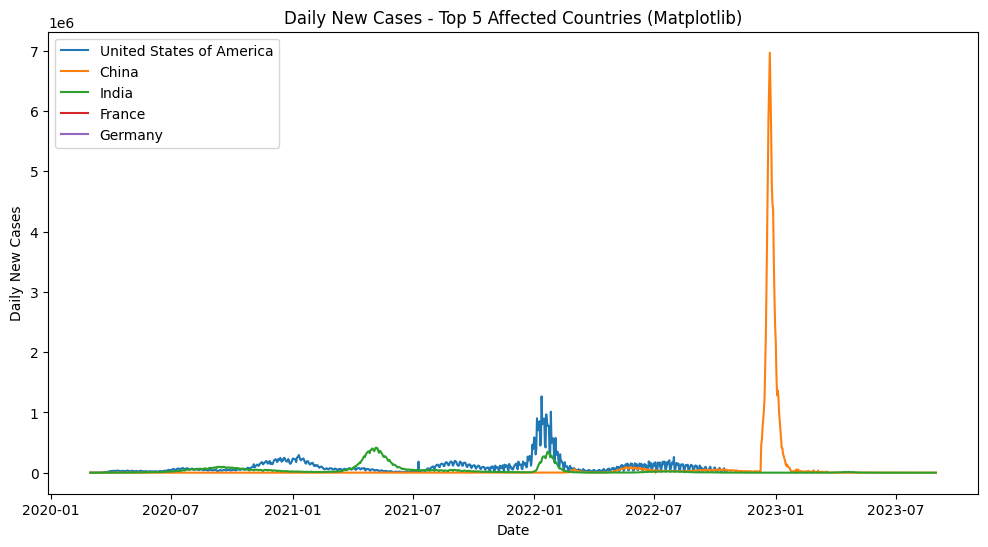

In [ ]:
# 1. Line plots for daily cases in the top 5 affected countries

# Find top 5 affected countries by cumulative cases
top5_countries = (
    df_covid_trimmed.groupby("Country")["Cumulative_cases"]
    .max()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter data
df_top5 = df_covid_trimmed[df_covid_trimmed["Country"].isin(top5_countries)]

# Plotting the data based on daily new cases
plt.figure(figsize=(12,6))
for country in top5_countries:
    country_data = df_top5[df_top5["Country"] == country]
    plt.plot(country_data["Date_reported"], country_data["New_cases"], label=country)

plt.xlabel("Date")
plt.ylabel("Daily New Cases")
plt.title("Daily New Cases - Top 5 Affected Countries (Matplotlib)")
plt.legend()
plt.show()


**Note:** On the y-axis, `1e6` means **1 million (1,000,000)** and `1e8` means **100 million (100,000,000)**.


---



## Question:
What we should have done instade to plot the top 5 countries least affected by COVID-19?

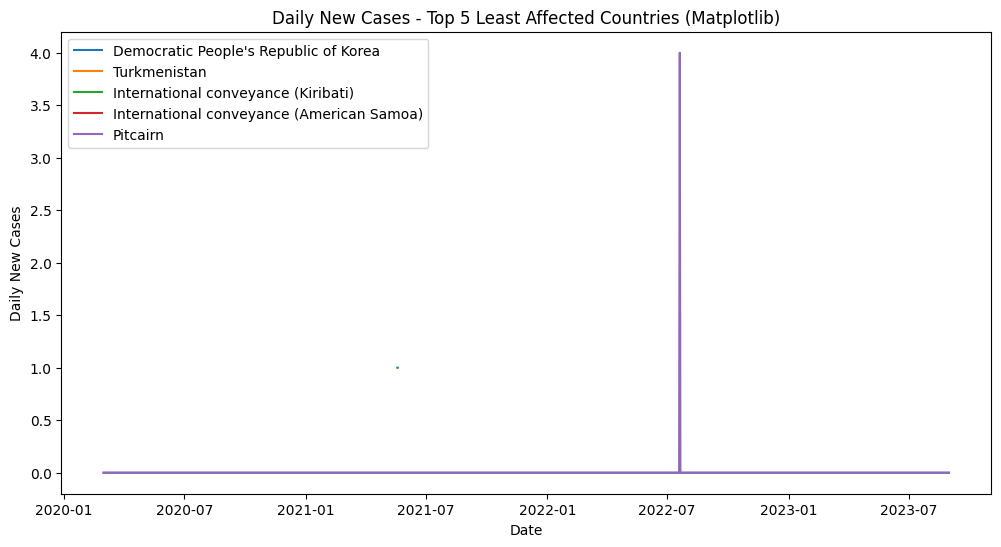

In [ ]:
# Find top 5 least affected countries by cumulative cases
least_affected_countries = (
    df_covid_trimmed.groupby("Country")["Cumulative_cases"]
    .max()
    .sort_values(ascending=True)  # Changed to ascending=True
    .head(5)
    .index
)

# Filter data for the least affected countries
df_least_affected = df_covid_trimmed[df_covid_trimmed["Country"].isin(least_affected_countries)]

# Plotting the data based on daily new cases for the least affected countries
plt.figure(figsize=(12,6))
for country in least_affected_countries:
    country_data = df_least_affected[df_least_affected["Country"] == country]
    plt.plot(country_data["Date_reported"], country_data["New_cases"], label=country)

plt.xlabel("Date")
plt.ylabel("Daily New Cases")
plt.title("Daily New Cases - Top 5 Least Affected Countries (Matplotlib)")
plt.legend()
plt.show()

### Task

Create a line plot which shows daily global new cases as one dramatic mountain shape

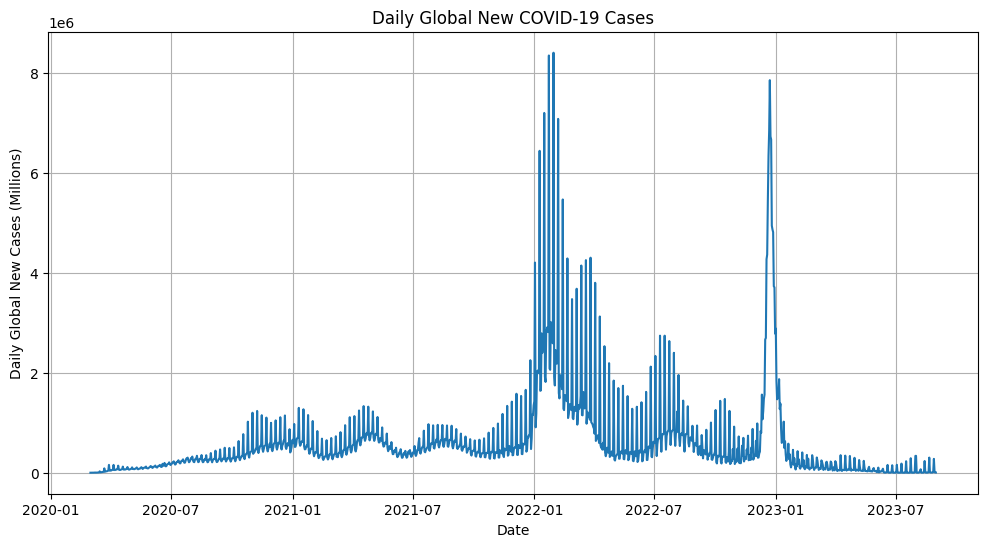

In [ ]:
# Aggregate daily global new cases
global_daily_cases = df_covid_trimmed.groupby("Date_reported")["New_cases"].sum().reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(global_daily_cases["Date_reported"], global_daily_cases["New_cases"])

plt.xlabel("Date")
plt.ylabel("Daily Global New Cases (Millions)") # Added label
plt.title("Daily Global New COVID-19 Cases")
plt.grid(True)

# Format y-axis labels to show in millions
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6)) # Format to millions

plt.show()



---

### Plot 2

This code aggregates COVID-19 new cases and deaths by quarter and visualizes them using a stacked bar chart, where deaths are shown on top of cases. It highlights the timeline of the pandemic’s impact, making it easier to compare peaks and proportions across different periods.

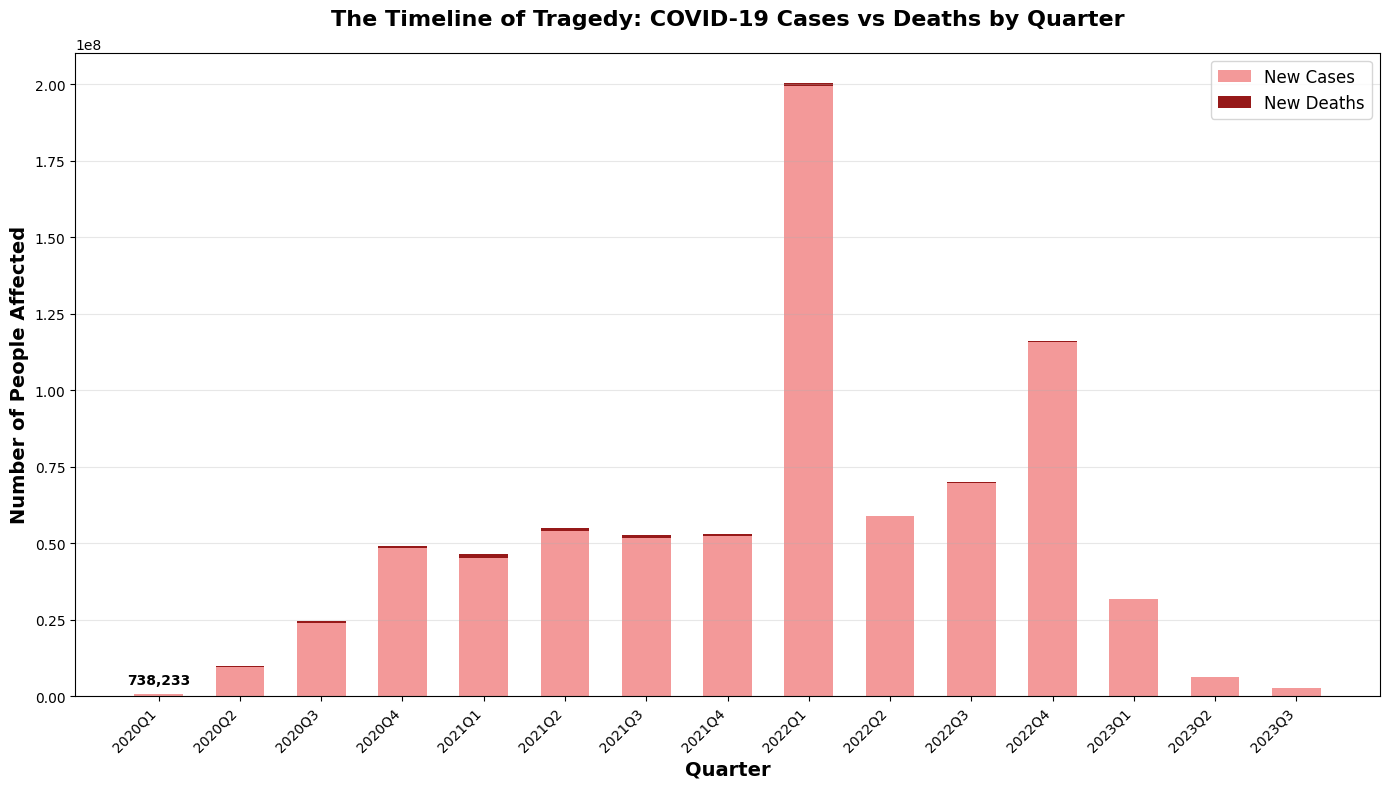

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# Cases vs Deaths Over Time (Quarterly)

# Show the relationship between cases and deaths over time periods

# Create quarterly data for cleaner visualization
df_copy = df_covid_trimmed.copy()
df_copy['Quarter'] = df_copy['Date_reported'].dt.to_period('Q')

# Aggregate by quarter
quarterly_data = df_copy.groupby('Quarter').agg({'New_cases': 'sum', 'New_deaths': 'sum'}).reset_index()

# Convert period to string for plotting
quarterly_data['Quarter_str'] = quarterly_data['Quarter'].astype(str)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Create bars
width = 0.6
cases_bars = ax.bar(quarterly_data['Quarter_str'], quarterly_data['New_cases'],
                       width, label='New Cases', color='lightcoral', alpha=0.8)
deaths_bars = ax.bar(quarterly_data['Quarter_str'], quarterly_data['New_deaths'],
                        width, bottom=quarterly_data['New_cases'],
                        label='New Deaths', color='darkred', alpha=0.9)

# Customize the plot
ax.set_title('The Timeline of Tragedy: COVID-19 Cases vs Deaths by Quarter',
                fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Quarter', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of People Affected', fontsize=14, fontweight='bold')
ax.legend(fontsize=12, loc='upper right')
ax.grid(axis='y', alpha=0.3)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add value annotations on the bars
for i, (cases, deaths) in enumerate(zip(quarterly_data['New_cases'], quarterly_data['New_deaths'])):
  # Annotate total at the top
  total = cases + deaths
  ax.annotate(f'{total:,.0f}',
                xy=(i, total),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom',
                fontweight='bold', fontsize=10)

  plt.tight_layout()
  plt.show()

  # Print insights
  max_quarter = quarterly_data.loc[quarterly_data['New_cases'].idxmax(), 'Quarter_str']
  max_cases = quarterly_data['New_cases'].max()



**Note:** On the y-axis, `1e6` means **1 million (1,000,000)** and `1e8` means **100 million (100,000,000)**.


---



### Task

Convert the above chart to double bar chart with the same data

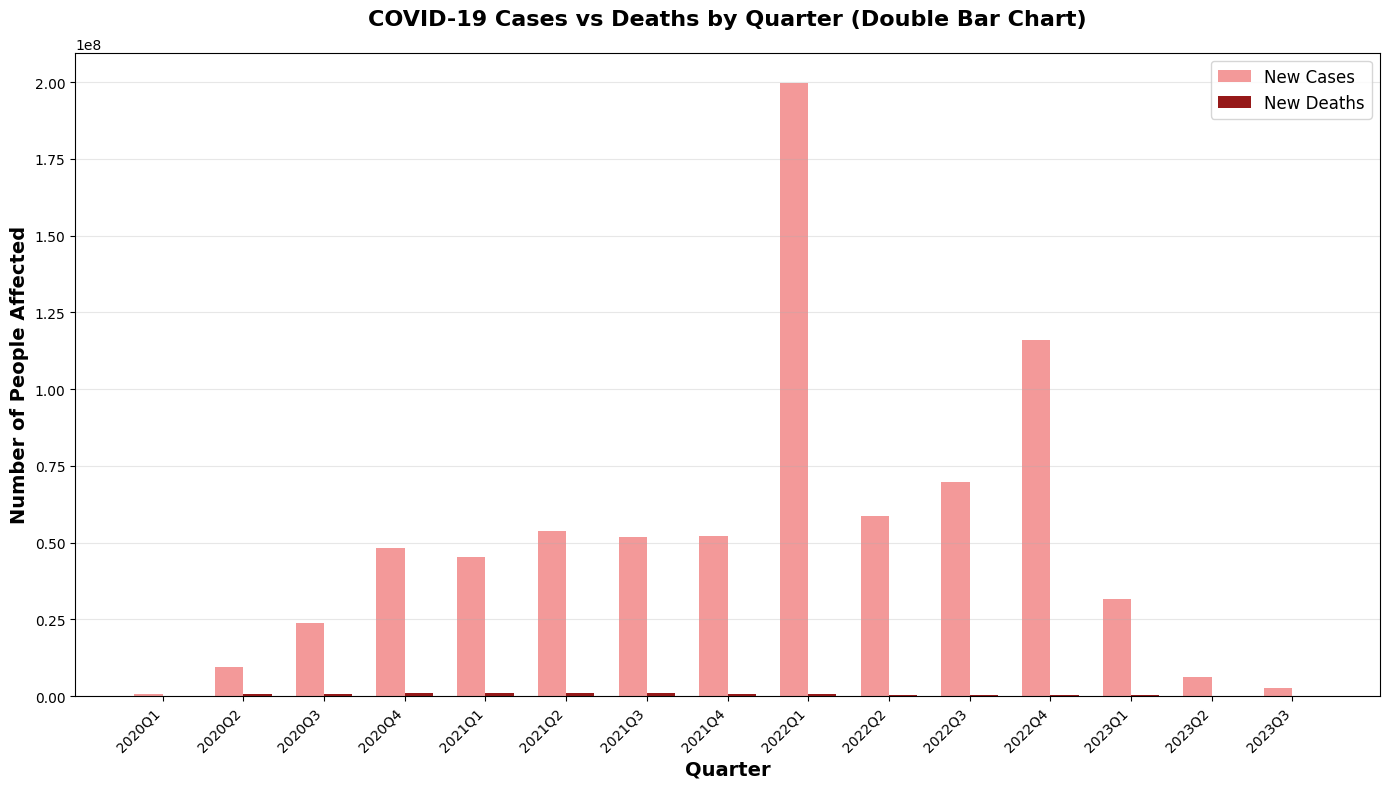

In [ ]:

# Create quarterly data for cleaner visualization
df_copy = df_covid_trimmed.copy()
df_copy['Quarter'] = df_copy['Date_reported'].dt.to_period('Q')

# Aggregate by quarter
quarterly_data = df_copy.groupby('Quarter').agg({'New_cases': 'sum', 'New_deaths': 'sum'}).reset_index()

# Convert period to string for plotting
quarterly_data['Quarter_str'] = quarterly_data['Quarter'].astype(str)

# Create the double bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Set positions for the bars
x = np.arange(len(quarterly_data['Quarter_str']))
width = 0.35  # Width of the bars

# Create bars for New Cases and New Deaths
cases_bars = ax.bar(x - width/2, quarterly_data['New_cases'], width, label='New Cases', color='lightcoral', alpha=0.8)
deaths_bars = ax.bar(x + width/2, quarterly_data['New_deaths'], width, label='New Deaths', color='darkred', alpha=0.9)

# Customize the plot
ax.set_title('COVID-19 Cases vs Deaths by Quarter (Double Bar Chart)',
                fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Quarter', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of People Affected', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(quarterly_data['Quarter_str'], rotation=45, ha='right')
ax.legend(fontsize=12, loc='upper right')
ax.grid(axis='y', alpha=0.3)

# Add value annotations on the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:,.0f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)

# autolabel(cases_bars) # Optionally add labels for cases
# autolabel(deaths_bars) # Optionally add labels for deaths


plt.tight_layout()
plt.show()

### Task

Construct a pie chart which Shows just top 10 countries mostly affected by COVID-19 ( by cummulative deaths)

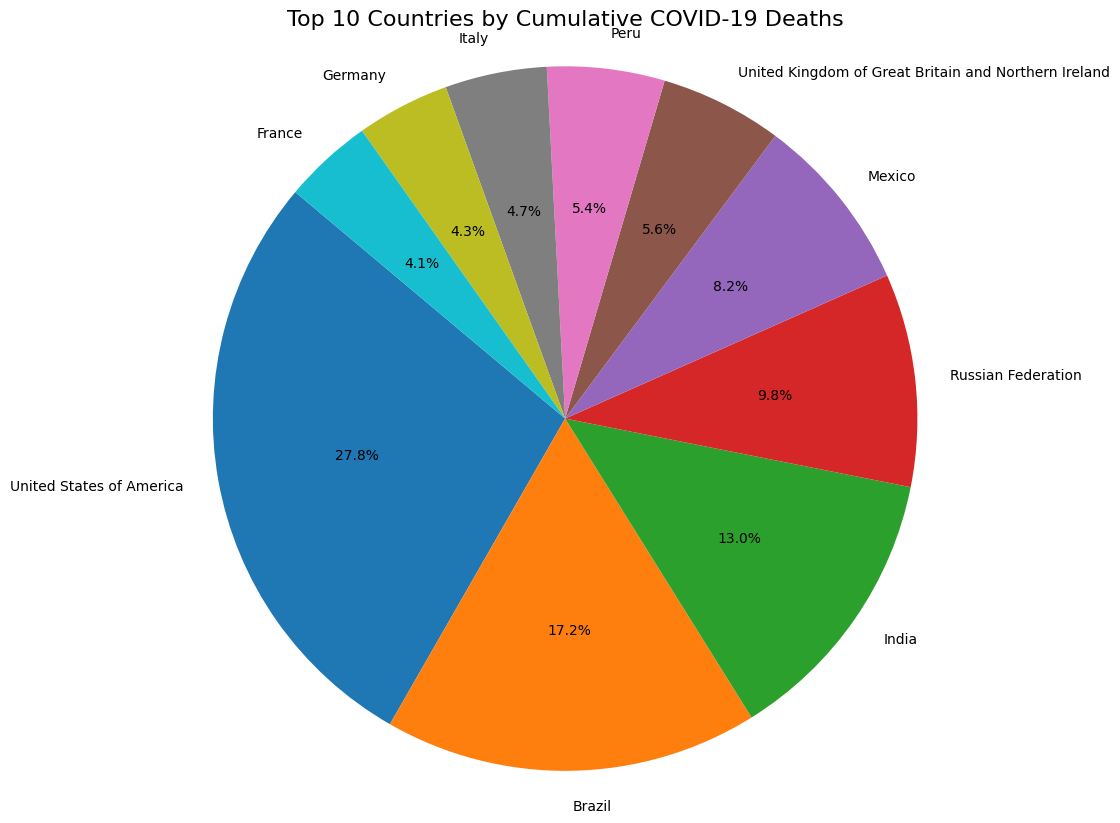

In [ ]:
# Group by country and find the maximum cumulative deaths
country_cumulative_deaths = df_covid_trimmed.groupby("Country")["Cumulative_deaths"].max().sort_values(ascending=False)

# Select the top 10 countries
top10_countries_deaths = country_cumulative_deaths.head(10)

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(top10_countries_deaths, labels=top10_countries_deaths.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Countries by Cumulative COVID-19 Deaths', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



---

### Plot 3

We aggregated monthly COVID-19 new cases by WHO region and visualized them using a heatmap.
This highlights when and where case surges were most intense across different regions.

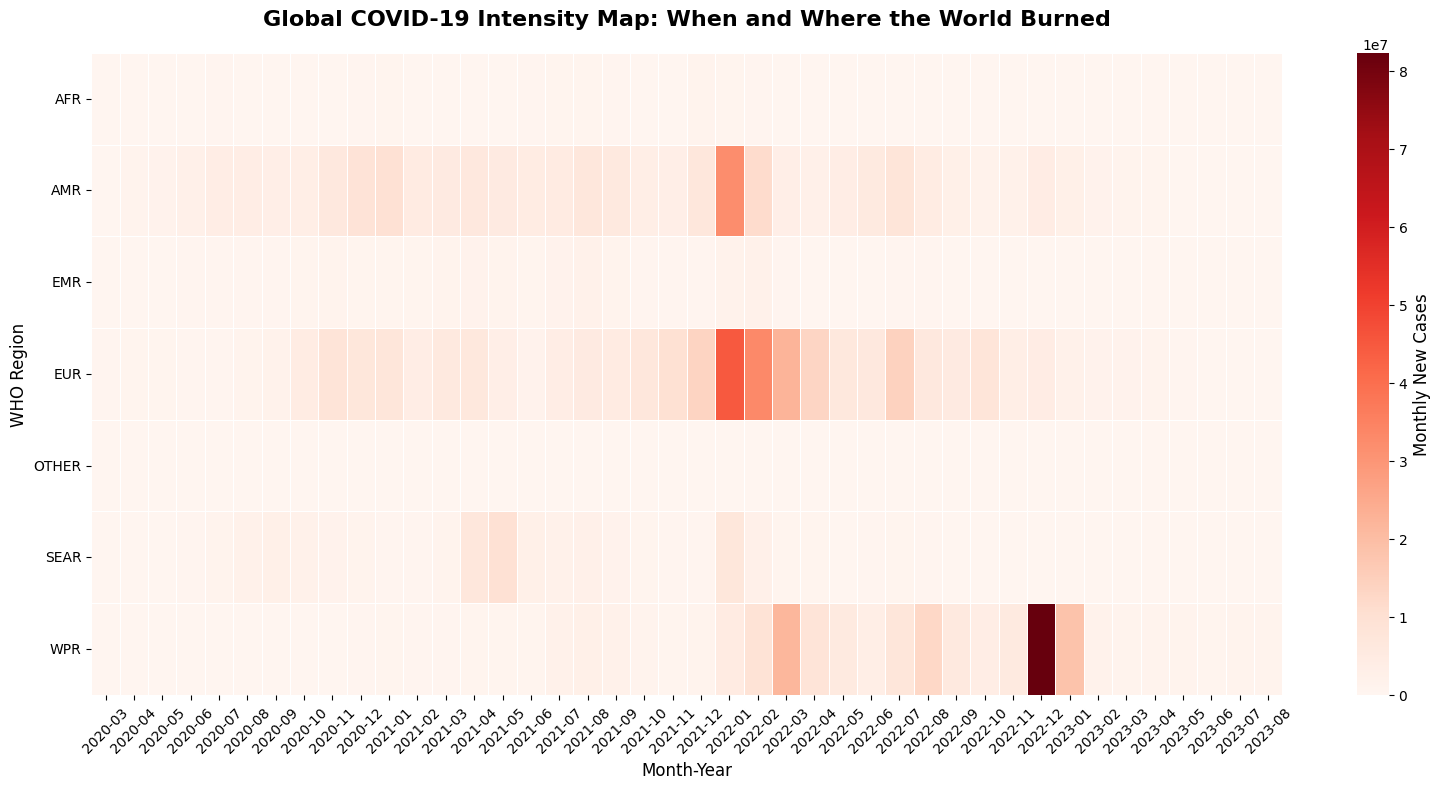

In [ ]:
#Create a powerful heatmap showing intensity across regions and time
# Create monthly data for cleaner visualization
df_monthly = df_covid_trimmed.copy()
df_monthly['Month_Year'] = df_monthly['Date_reported'].dt.to_period('M')

# Aggregate by WHO region and month
heatmap_data = df_monthly.groupby(['WHO_region', 'Month_Year'])['New_cases'].sum().reset_index()
heatmap_pivot = heatmap_data.pivot(index='WHO_region', columns='Month_Year', values='New_cases')

# Fill missing values with 0
heatmap_pivot = heatmap_pivot.fillna(0)

# Create the heatmap
plt.figure(figsize=(16, 8))

# Use a dramatic color scheme
sns.heatmap(heatmap_pivot,
            cmap='Reds',
            cbar_kws={'label': 'Monthly New Cases'},
            linewidths=0.5,
            linecolor='white')

plt.title('Global COVID-19 Intensity Map: When and Where the World Burned',
    fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('WHO Region', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Add colorbar label
cbar = plt.gca().collections[0].colorbar
cbar.ax.yaxis.label.set_size(12)

plt.tight_layout()
plt.show()

### Task:

1) Visualize another heatmap showing quaterly new deaths' intensity by regions.
2) Visualize a heatmap showing monthly new cases' intensity by top 10 countries

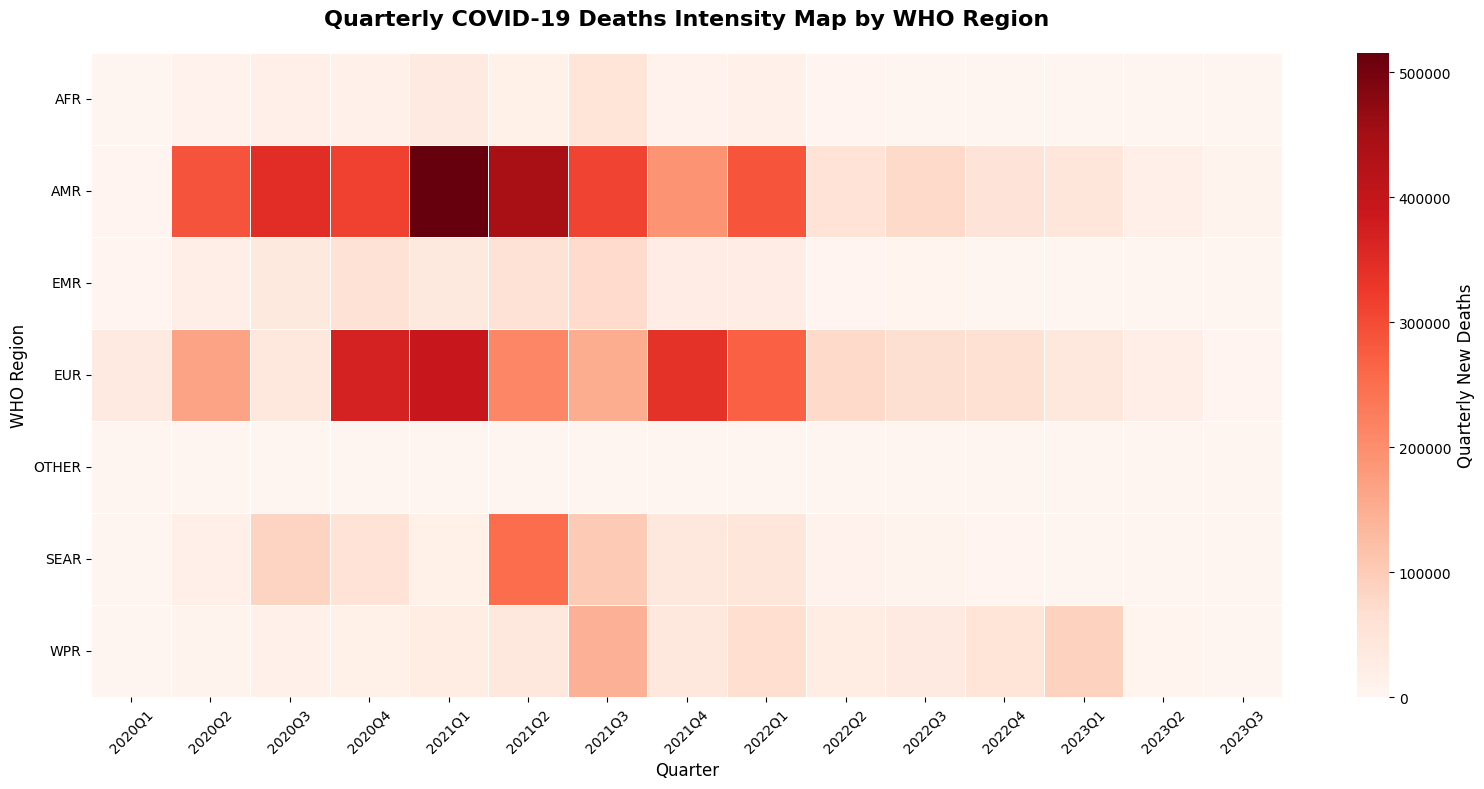

In [ ]:
# Visualize another heatmap showing quarterly new deaths' intensity by regions.

# Create quarterly data
df_quarterly = df_covid_trimmed.copy()
df_quarterly['Quarter'] = df_quarterly['Date_reported'].dt.to_period('Q')

# Aggregate by WHO region and quarter
heatmap_deaths_data = df_quarterly.groupby(['WHO_region', 'Quarter'])['New_deaths'].sum().reset_index()
heatmap_deaths_pivot = heatmap_deaths_data.pivot(index='WHO_region', columns='Quarter', values='New_deaths')

# Fill missing values with 0
heatmap_deaths_pivot = heatmap_deaths_pivot.fillna(0)

# Create the heatmap
plt.figure(figsize=(16, 8))

sns.heatmap(heatmap_deaths_pivot,
            cmap='Reds',
            cbar_kws={'label': 'Quarterly New Deaths'},
            linewidths=0.5,
            linecolor='white')

plt.title("Quarterly COVID-19 Deaths Intensity Map by WHO Region",
    fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('WHO Region', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Add colorbar label
cbar = plt.gca().collections[0].colorbar
cbar.ax.yaxis.label.set_size(12)

plt.tight_layout()
plt.show()

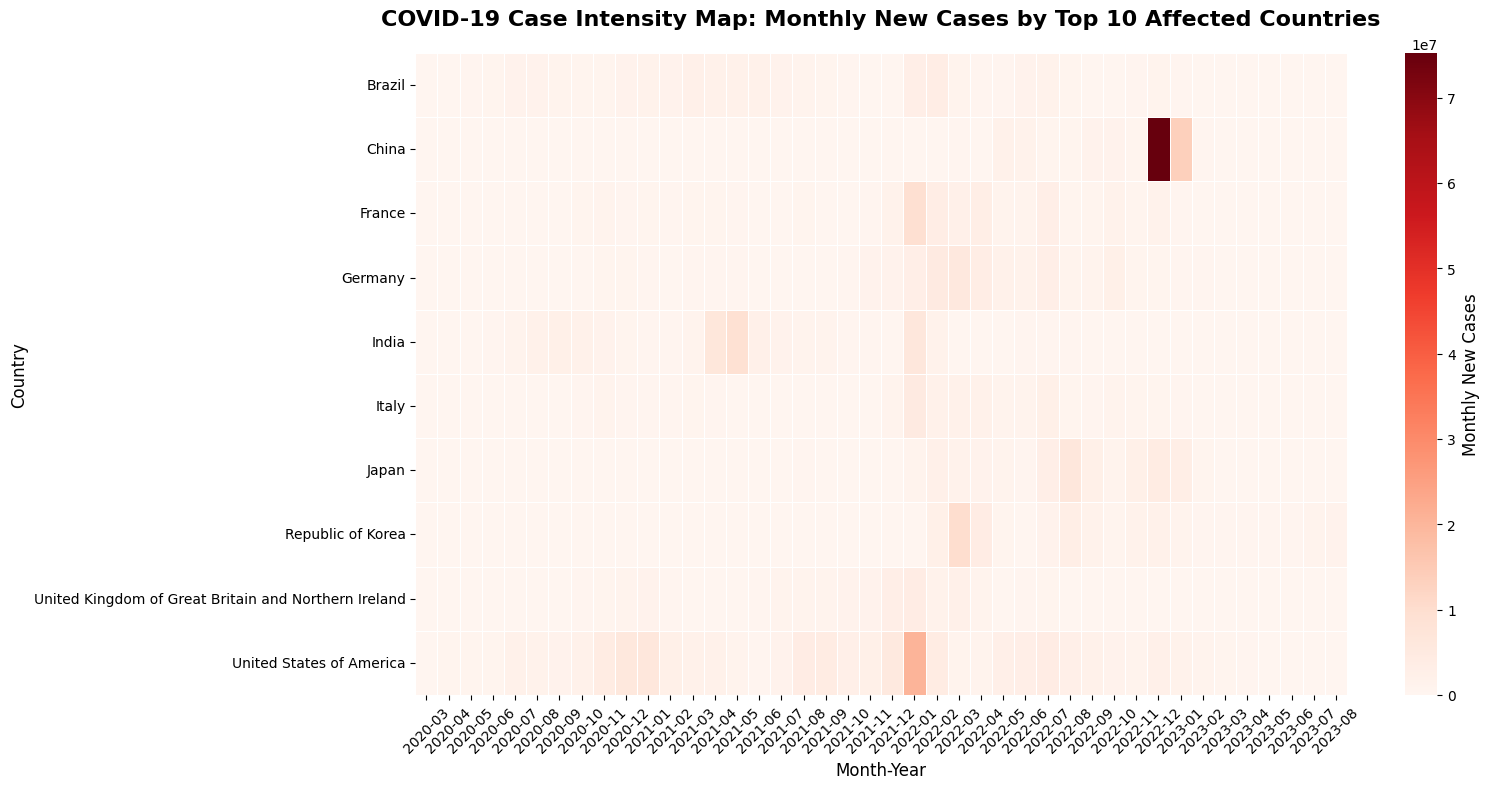

In [ ]:
# Visualize a heatmap showing monthly new cases' intensity by top 10 countries

# Find the top 10 most affected countries by cumulative cases
top10_countries_cases = df_covid_trimmed.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False).head(10).index

# Filter data for the top 10 countries
df_covid_top10_countries = df_covid_trimmed[df_covid_trimmed['Country'].isin(top10_countries_cases)].copy()

# Create monthly data for cleaner visualization
df_covid_top10_monthly = df_covid_top10_countries.copy()
df_covid_top10_monthly['Month_Year'] = df_covid_top10_monthly['Date_reported'].dt.to_period('M')

# Aggregate by Country and month
heatmap_covid_top10_data = df_covid_top10_monthly.groupby(['Country', 'Month_Year'])['New_cases'].sum().reset_index()
heatmap_covid_top10_pivot = heatmap_covid_top10_data.pivot(index='Country', columns='Month_Year', values='New_cases')

# Fill missing values with 0
heatmap_covid_top10_pivot = heatmap_covid_top10_pivot.fillna(0)

# Create the heatmap
plt.figure(figsize=(16, 8))

sns.heatmap(heatmap_covid_top10_pivot,
            cmap='Reds',
            cbar_kws={'label': 'Monthly New Cases'},
            linewidths=0.5,
            linecolor='white')

plt.title('COVID-19 Case Intensity Map: Monthly New Cases by Top 10 Affected Countries',
    fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Add colorbar label
cbar = plt.gca().collections[0].colorbar
cbar.ax.yaxis.label.set_size(12)

plt.tight_layout()
plt.show()



---



## Interactive COVID-19 Dashboard with Plotly

In this section, we build an interactive dashboard to explore the COVID-19 dataset using **Plotly**.  
The dashboard allows dynamic filtering, visualization, and comparison of different trends such as  
- **Daily New Cases and Deaths** across regions and countries  
- **Cumulative trends** over time  
- **Stacked bar charts** and **line plots** for deeper insights  

This interactive approach provides users with the flexibility to investigate the data from multiple perspectives,  
making the analysis more engaging and intuitive compared to static charts.


###  About Plotly

**Plotly** is a powerful, open-source Python library that allows us to create **interactive and publication-quality visualizations**—like line plots, bar charts, heatmaps, and more—right inside our notebooks. It enables users to **zoom, hover, and explore data dynamically**, making data storytelling both engaging and intuitive.


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go



# ---- 1. Line Chart: Global New Cases Over Time ----
fig_cases = px.line(
    df_covid_trimmed.groupby('Date_reported', as_index=False).sum(),
    x="Date_reported",
    y="New_cases",
    title="Global New COVID-19 Cases Over Time"
)

# ---- 2. Line Chart: Global New Deaths Over Time ----
fig_deaths = px.line(
    df_covid_trimmed.groupby('Date_reported', as_index=False).sum(),
    x="Date_reported",
    y="New_deaths",
    title="Global New COVID-19 Deaths Over Time",
    color_discrete_sequence=["red"]
)

# ---- 3. Stacked Bar Chart: New Cases vs New Deaths grouped by WHO Region ----
region_grouped = df_covid_trimmed.groupby(['Date_reported', 'WHO_region'], as_index=False)[['New_cases', 'New_deaths']].sum()

fig_stacked = go.Figure()
fig_stacked.add_trace(go.Bar(
    x=region_grouped["Date_reported"],
    y=region_grouped["New_cases"],
    name="New Cases",
    marker_color="blue"
))
fig_stacked.add_trace(go.Bar(
    x=region_grouped["Date_reported"],
    y=region_grouped["New_deaths"],
    name="New Deaths",
    marker_color="red"
))

fig_stacked.update_layout(
    barmode="stack",
    title="New Cases vs New Deaths (Stacked) by WHO Region",
    xaxis_title="Date",
    yaxis_title="Count",
)

# ---- 4. Choropleth Map: Total Cases by Country ----
country_grouped = df_covid_trimmed.groupby('Country', as_index=False)['Cumulative_cases'].max()

fig_map = px.choropleth(
    country_grouped,
    locations="Country",
    locationmode="country names",
    color="Cumulative_cases",
    hover_name="Country",
    color_continuous_scale="Viridis",
    title="Global Distribution of Total COVID-19 Cases"
)

# ---- Display all interactive charts ----
fig_cases.show()
fig_deaths.show()
fig_stacked.show()
fig_map.show()


## Question

Interpret the above map shown.

Looking at this map showing the "Global Distribution of Total COVID-19 Cases," I can interpret several key patterns:

* **Highest case counts (yellow/bright areas):** The United States and China appear to have the highest cumulative COVID-19 cases, shown in yellow according to the color scale that goes up to 100M cases.

* **High-medium cases (blue-green):** Countries like Brazil, Russia, and India show substantial case numbers in the 40-80M range.

* **Lower cases (purple/dark):** Most of Africa, parts of Asia, and smaller countries show lower cumulative totals, appearing in darker purple shades.


---






---

#Assignment:

Find a similart dataset (e.g. `Ebola | 2014-2016 | Western Africa Ebola Outbreak` ) and extract a similar visualization out of it.





checkout:  `https://www.kaggle.com/datasets/imdevskp/ebola-outbreak-20142016-complete-dataset`

## Load the ebola dataset.

In [ ]:
# Replace with your Google Drive file ID which has public view access
file_id = "1brsEvMa3Z39STnyHxpsXapjWbN_kqee6"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
  # Read CSV directly into pandas
  df_ebola = pd.read_csv(url)

  # Show first few rows
  print(df_ebola.head())
except Exception as e:
    print(f"Error loading data: {e}")

        Country        Date  \
0        Guinea  2014-08-29   
1       Nigeria  2014-08-29   
2  Sierra Leone  2014-08-29   
3       Liberia  2014-08-29   
4  Sierra Leone  2014-09-05   

   Cumulative no. of confirmed, probable and suspected cases  \
0                                              648.0           
1                                               19.0           
2                                             1026.0           
3                                             1378.0           
4                                             1261.0           

   Cumulative no. of confirmed, probable and suspected deaths  
0                                              430.0           
1                                                7.0           
2                                              422.0           
3                                              694.0           
4                                              491.0           


### Ebola Dataset Subsetting

In this step, we select only the relevant columns from the Ebola dataset for analysis: **Country**, **Date**, total **Cumulative Cases**, and total **Cumulative Deaths**.  
We then rename the long column names to shorter, more readable ones (`Cumulative_cases` and `Cumulative_deaths`) for easier handling in further analysis.  

Finally, we display the first few rows of the cleaned dataset to verify the changes.



In [ ]:
# Rename the columns for better understanding
df_ebola_subset = df_ebola.rename(columns={
    "Cumulative no. of confirmed, probable and suspected cases": "Cumulative_cases",
    "Cumulative no. of confirmed, probable and suspected deaths": "Cumulative_deaths"
}).copy()

# Check the first few rows of the subsetted data with new column names
print("Subsetted Ebola dataset with shorter column names:")
display(df_ebola_subset.head())

Subsetted Ebola dataset with shorter column names:


,Country,Date,Cumulative_cases,Cumulative_deaths
0,Guinea,2014-08-29,648.0,430.0
1,Nigeria,2014-08-29,19.0,7.0
2,Sierra Leone,2014-08-29,1026.0,422.0
3,Liberia,2014-08-29,1378.0,694.0
4,Sierra Leone,2014-09-05,1261.0,491.0


## Preparing the Ebola Dataset for Analysis

- **Date conversion:** Converted the *Date* column into datetime format for proper time-based operations.  
- **Sorting:** Ordered the data by *Country* and *Date* to ensure accurate daily calculations.  
- **Daily new cases & deaths:** Computed as the difference from the previous day within each country.  
- **Data cleaning:** Any negative values (from reporting inconsistencies) were replaced with **0**.  

This results in a cleaned dataset containing both cumulative and daily figures for further analysis, verified by checking the first and last 5 rows.


In [ ]:
# Convert 'Date' column to datetime objects
df_ebola_subset['Date'] = pd.to_datetime(df_ebola_subset['Date'])

# Define the date range for the Ebola outbreak (2014-08-29 to 2016-03-23)
# start_date_ebola = "2014-08-29"
# end_date_ebola = "2016-03-23"

# Filter the rows by the date range
# df_ebola_trimmed = df_ebola_subset[(df_ebola_subset['Date'] >= start_date_ebola) & (df_ebola_subset['Date'] <= end_date_ebola)].copy()
df_ebola_trimmed = df_ebola_subset.copy()

# Sort the data by Country and Date to ensure correct calculation of daily new cases/deaths
df_ebola_trimmed = df_ebola_trimmed.sort_values(by=['Country', 'Date'])

# Calculate daily new cases and deaths by finding the difference from the previous day within each country
df_ebola_trimmed['New_cases'] = df_ebola_trimmed.groupby('Country')['Cumulative_cases'].diff().fillna(0)
df_ebola_trimmed['New_deaths'] = df_ebola_trimmed.groupby('Country')['Cumulative_deaths'].diff().fillna(0)

# Replace any negative values in 'New_cases' and 'New_deaths' with 0 (due to reporting inconsistencies)
df_ebola_trimmed['New_cases'] = df_ebola_trimmed['New_cases'].apply(lambda x: max(0, x))
df_ebola_trimmed['New_deaths'] = df_ebola_trimmed['New_deaths'].apply(lambda x: max(0, x))


# Check subset
print("Trimmed Ebola dataset shape:", df_ebola_trimmed.shape)
print("\nFirst 5 rows of trimmed dataset:")
display(df_ebola_trimmed.head())
print("\nLast 5 rows of trimmed dataset:")
display(df_ebola_trimmed.tail())

Trimmed Ebola dataset shape: (2485, 6)

First 5 rows of trimmed dataset:


,Country,Date,Cumulative_cases,Cumulative_deaths,New_cases,New_deaths
0,Guinea,2014-08-29,648.0,430.0,0.0,0.0
7,Guinea,2014-09-05,812.0,517.0,164.0,87.0
10,Guinea,2014-09-08,862.0,555.0,50.0,38.0
14,Guinea,2014-09-12,861.0,557.0,0.0,2.0
21,Guinea,2014-09-16,936.0,595.0,75.0,38.0



Last 5 rows of trimmed dataset:


,Country,Date,Cumulative_cases,Cumulative_deaths,New_cases,New_deaths
2439,United States of America,2015-12-17,4.0,1.0,0.0,0.0
2449,United States of America,2015-12-22,4.0,1.0,0.0,0.0
2461,United States of America,2015-12-23,4.0,1.0,0.0,0.0
2470,United States of America,2015-12-29,4.0,1.0,0.0,0.0
2484,United States of America,2016-03-23,4.0,1.0,0.0,0.0


## EDA including visualization


### Top 5 Most Affected Countries by Ebola

- **Selection:** Identified the **top 5 countries** with the highest cumulative Ebola cases.  
- **Daily Trends (Line Plot):** A line chart was plotted to visualize **daily new cases** in each of these countries. This highlights the outbreak dynamics and peak infection periods.  
- **Cumulative Impact (Double Bar Chart):** A grouped bar chart was created to compare the **total cumulative cases** and **cumulative deaths** for the top 5 countries, making it easier to see both the scale of infection and its fatality impact.  

These plots together provide insights into both the **progression** and the **severity** of the outbreak in the worst-affected regions.


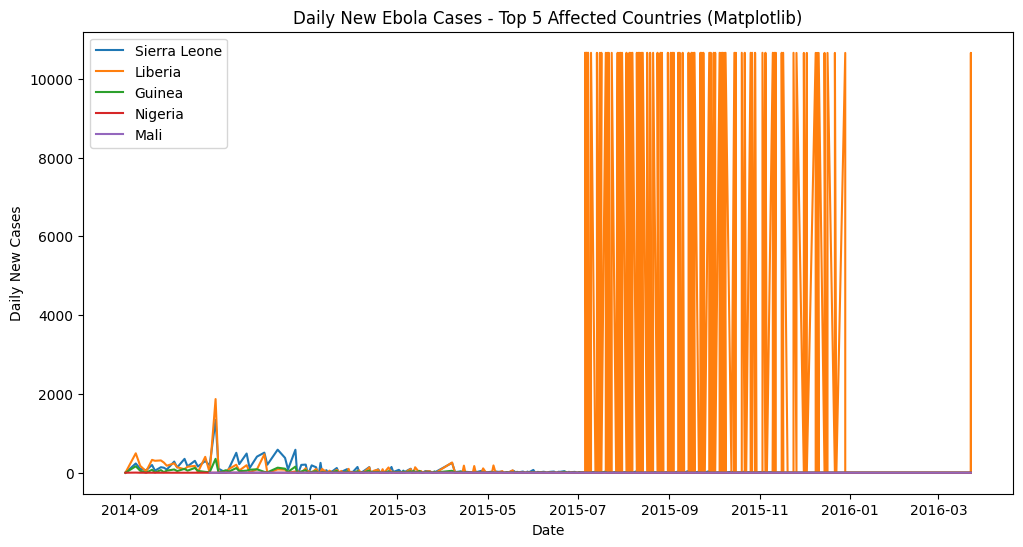

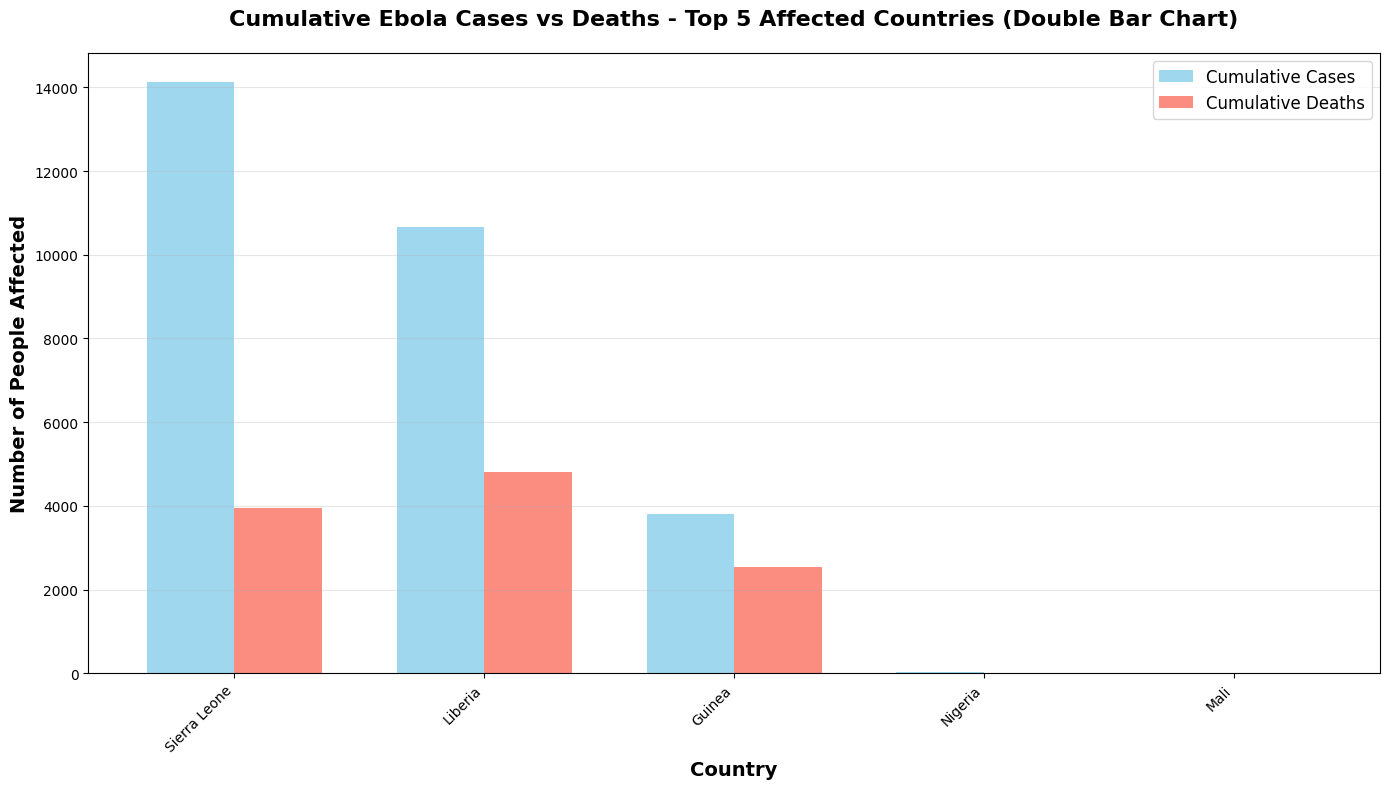

In [ ]:
# Calculate daily new cases and deaths
# This is already done in the data cleaning step above, so we can skip this step here.
# df_ebola_trimmed['New_cases'] = df_ebola_trimmed.groupby('Country')['Cumulative_cases'].diff().fillna(0)
# df_ebola_trimmed['New_deaths'] = df_ebola_trimmed.groupby('Country')['Cumulative_deaths'].diff().fillna(0)

# Find the top 5 most affected countries by cumulative cases
top5_countries_ebola = df_ebola_trimmed.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False).head(5).index

# Filter data for the top 5 countries
df_ebola_top_countries = df_ebola_trimmed[df_ebola_trimmed['Country'].isin(top5_countries_ebola)].copy()

# Plotting the data based on daily new cases for the top 5 affected countries
plt.figure(figsize=(12, 6))
for country in top5_countries_ebola:
    country_data = df_ebola_top_countries[df_ebola_top_countries['Country'] == country]
    plt.plot(country_data['Date'], country_data['New_cases'], label=country)

plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.title('Daily New Ebola Cases - Top 5 Affected Countries (Matplotlib)')
plt.legend()
plt.show()

# Create a double bar plot for cumulative cases and deaths for the top 5 affected countries
# Get the last cumulative values for each of the top 5 countries
cumulative_summary = df_ebola_top_countries.groupby('Country').agg({
    'Cumulative_cases': 'max',
    'Cumulative_deaths': 'max'
}).reset_index()

# Sort by cumulative cases for better visualization
cumulative_summary = cumulative_summary.sort_values(by='Cumulative_cases', ascending=False)

# Create the double bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Set positions for the bars
x = np.arange(len(cumulative_summary['Country']))
bar_width = 0.35

# Create bars for Cumulative Cases and Cumulative Deaths
cases_bars = ax.bar(x - bar_width/2, cumulative_summary['Cumulative_cases'], bar_width, label='Cumulative Cases', color='skyblue', alpha=0.8)
deaths_bars = ax.bar(x + bar_width/2, cumulative_summary['Cumulative_deaths'], bar_width, label='Cumulative Deaths', color='salmon', alpha=0.9)

# Customize the plot
ax.set_title('Cumulative Ebola Cases vs Deaths - Top 5 Affected Countries (Double Bar Chart)',
                fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Country', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of People Affected', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(cumulative_summary['Country'], rotation=45, ha='right')
ax.legend(fontsize=12, loc='upper right')
ax.grid(axis='y', alpha=0.3)


plt.tight_layout()
plt.show()

### Ebola Monthly Case Intensity (Heatmap)

- **Monthly Aggregation:** Converted the dataset into **monthly aggregates** of new cases for each country.  
- **Pivot Table:** Reshaped the data with *countries* as rows and *Month-Year* as columns. Missing values were filled with **0** to avoid gaps.  
- **Heatmap Visualization:** A heatmap was generated to show the **intensity of new Ebola cases** over time and across countries.  

This visualization makes it easy to spot **when outbreaks peaked** and in **which countries the spread was most severe**, highlighting both **temporal** and **geographical patterns** of the epidemic.


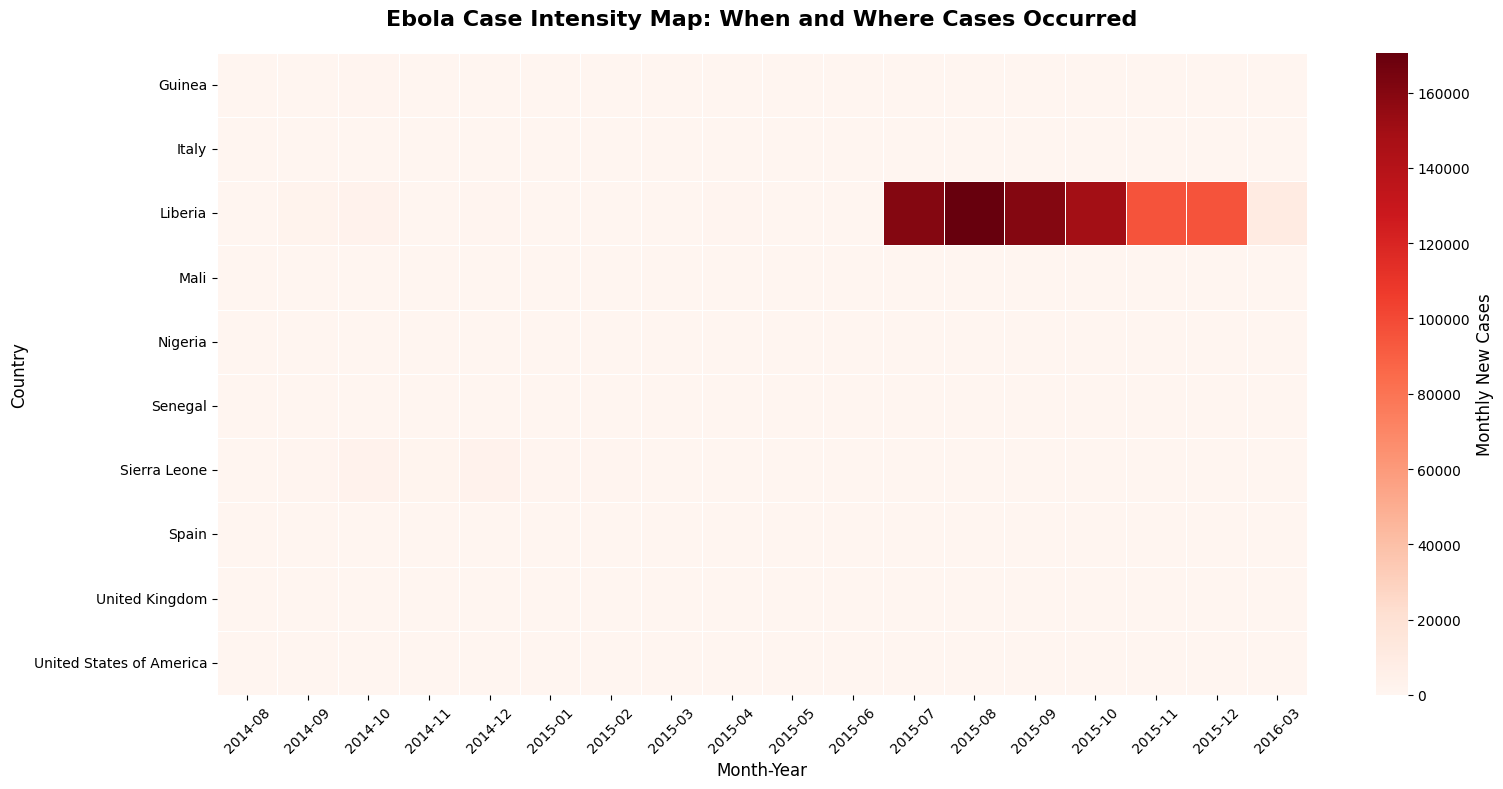

In [ ]:
# Create monthly data for cleaner visualization
df_ebola_monthly = df_ebola_trimmed.copy()
df_ebola_monthly['Month_Year'] = df_ebola_monthly['Date'].dt.to_period('M')

# Aggregate by Country and month
heatmap_ebola_data = df_ebola_monthly.groupby(['Country', 'Month_Year'])['New_cases'].sum().reset_index()
heatmap_ebola_pivot = heatmap_ebola_data.pivot(index='Country', columns='Month_Year', values='New_cases')

# Fill missing values with 0
heatmap_ebola_pivot = heatmap_ebola_pivot.fillna(0)

# Create the heatmap
plt.figure(figsize=(16, 8))

sns.heatmap(heatmap_ebola_pivot,
            cmap='Reds',
            cbar_kws={'label': 'Monthly New Cases'},
            linewidths=0.5,
            linecolor='white')

plt.title('Ebola Case Intensity Map: When and Where Cases Occurred',
    fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Add colorbar label
cbar = plt.gca().collections[0].colorbar
cbar.ax.yaxis.label.set_size(12)

plt.tight_layout()
plt.show()

### Top 4 Countries by Ebola Deaths (Pie Chart)

- **Selection:** Identified the **top 4 countries** with the highest cumulative deaths from the Ebola outbreak.  
- **Pie Chart:** A pie chart shows the **percentage share of deaths** among these countries.  

This visualization highlights the countries that bore the **greatest fatal impact** of the epidemic, making it clear how concentrated the deaths were within a small number of nations.


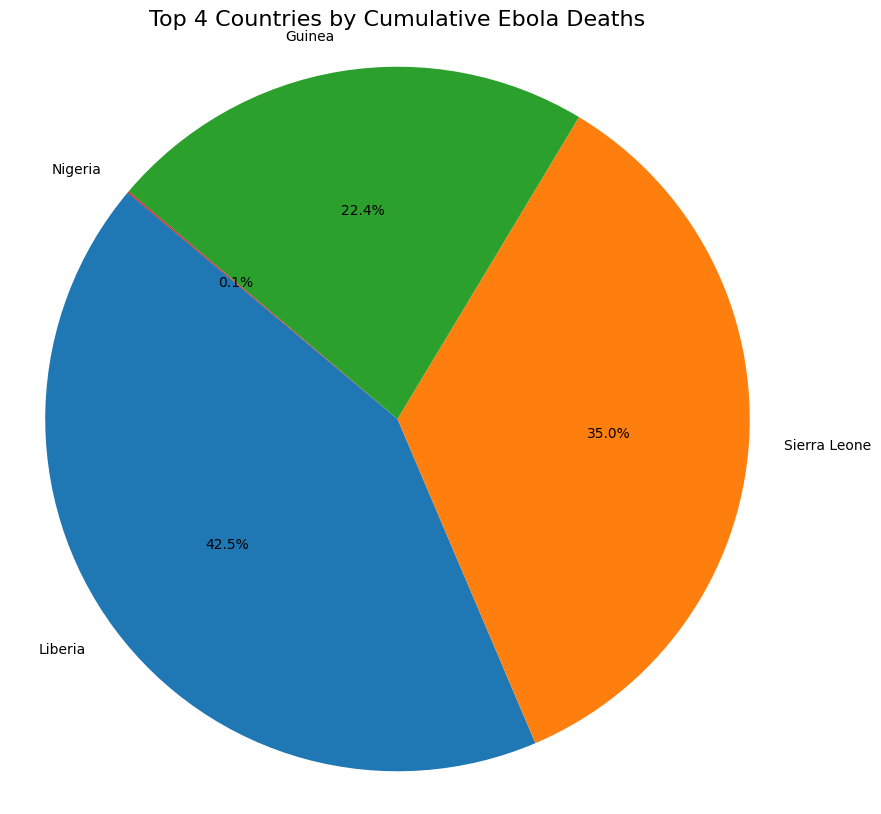

In [ ]:
# Create a pie chart which Shows top 4 countries mostly affected by Ebola (by cumulative deaths)

# Group by country and find the maximum cumulative deaths for Ebola dataset
country_cumulative_deaths_ebola = df_ebola_trimmed.groupby("Country")["Cumulative_deaths"].max().sort_values(ascending=False)

# Select the top 4 countries
top4_countries_deaths_ebola = country_cumulative_deaths_ebola.head(4)

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(top4_countries_deaths_ebola, labels=top4_countries_deaths_ebola.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 4 Countries by Cumulative Ebola Deaths', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Interactive Ebola Visualizations (Plotly)

To enhance data exploration, we use **Plotly** for interactive charts:

1. **Line Chart – Daily New Cases**: Shows the overall trend of new Ebola cases reported each day.  
2. **Line Chart – Daily New Deaths**: Highlights daily fatalities, plotted in red for clarity.  
3. **Choropleth Map – Total Cases by Country**: Visualizes the global distribution of cumulative Ebola cases, allowing geographic comparison of outbreak severity.  

These interactive plots make it easier to identify **trends over time** and the **countries most affected** by the outbreak.


In [ ]:
# Interactive Ebola Visualizations with Plotly

# Ensure the 'Date' column is in datetime format (already done in data cleaning but good to be sure)
df_ebola_trimmed['Date'] = pd.to_datetime(df_ebola_trimmed['Date'])

# 1. Line Chart: Daily New Cases Over Time (Global)
# Aggregate daily global new cases
ebola_daily_trends = df_ebola_trimmed.groupby('Date', as_index=False)[['New_cases', 'New_deaths']].sum()

fig_ebola_cases = px.line(
    ebola_daily_trends,
    x="Date",
    y="New_cases",
    title="Daily New Ebola Cases Over Time (Global)"
)

# 2. Line Chart: Daily New Deaths Over Time (Global)
fig_ebola_deaths = px.line(
    ebola_daily_trends,
    x="Date",
    y="New_deaths",
    title="Daily New Ebola Deaths Over Time (Global)",
    color_discrete_sequence=["red"]
)

# 3. Choropleth Map: Total Cases by Country (Ebola)
# Get the last cumulative values for each country
country_cumulative_cases_ebola = df_ebola_trimmed.groupby('Country', as_index=False)['Cumulative_cases'].max()

fig_ebola_map = px.choropleth(
    country_cumulative_cases_ebola,
    locations="Country",
    locationmode="country names",
    color="Cumulative_cases",
    hover_name="Country",
    color_continuous_scale="Viridis",
    title="Global Distribution of Total Ebola Cases"
)

# ---- Display all interactive charts ----
fig_ebola_cases.show()
fig_ebola_deaths.show()
fig_ebola_map.show()

### Interpretation of the Interactive Map: Global Distribution of Total Ebola Cases

- **Highest case counts (darker shades):** The map highlights that the highest cumulative Ebola cases are concentrated in **Western Africa**, especially in **Sierra Leone, Liberia, and Guinea**. These countries are shown in darker shades according to the color scale.  

- **Lower case counts (lighter shades):** Other countries around the world display much lower or zero cumulative cases, represented in lighter shades or not highlighted at all. This suggests that while a few cases were imported globally, the outbreak remained regionally concentrated.  

- **Geographical concentration:** The visualization clearly shows that the **epicenter of the outbreak** was Western Africa, making it easy to identify the most severely affected areas.  
